In [40]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import math
import copy
import torch
import torch.nn as nn
import torch.nn.functional as F
import random
import pandas as pd
import numpy as np
from   sklearn.preprocessing   import LabelEncoder          # кодировка категорий
import pandas as pd
from torch.autograd import Variable
import numpy as np
import torch.functional as F
from   sklearn.preprocessing   import LabelEncoder          # кодировка категорий
from   sklearn.decomposition import PCA
from   sklearn import linear_model
import matplotlib.pyplot as plt                   # постороение графиков
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import torch.optim as optim
import torch
from torch.utils.data import DataLoader, TensorDataset

In [41]:
# Читаем файл с компетенциями
df = pd.read_excel('/content/Dataset_L_4_25_diff_4_COLAB.xlsx')

In [42]:
df['SKILLS'] = df['SKILLS'].astype(str)

# Длинна каждого посчитаем длинну
df['list_of_skill'] = df['SKILLS'].apply(lambda x: x.split(','))

In [43]:
df['cnt_skill'] = df['list_of_skill'].apply(lambda x: len(x))

In [44]:
df.head(5)

,SKILLS,list_of_skill,cnt_skill
0,"1С ПРЕДПРИЯТИЕ 8,ФИНАНСОВАЯ ОТЧЕТНОСТЬ,УЧЕТ ОС...","[1С ПРЕДПРИЯТИЕ 8, ФИНАНСОВАЯ ОТЧЕТНОСТЬ, УЧЕТ...",25
1,"1С ТОРГОВЛЯ,КЛИЕНТООРИЕНТИРОВАННОСТЬ,1С УПРАВЛ...","[1С ТОРГОВЛЯ, КЛИЕНТООРИЕНТИРОВАННОСТЬ, 1С УПР...",25
2,"1С УПРАВЛЕНИЕ ТОРГОВЛЕЙ,1С БИТРИКС,CRM,B2B ПРО...","[1С УПРАВЛЕНИЕ ТОРГОВЛЕЙ, 1С БИТРИКС, CRM, B2B...",25
3,"3D ГРАФИКА,ГРАФИЧЕСКИЙ ДИЗАЙН,ADOBE INDESIGN,В...","[3D ГРАФИКА, ГРАФИЧЕСКИЙ ДИЗАЙН, ADOBE INDESIG...",25
4,"ADOBE PHOTOSHOP,ФОТОГРАФИЯ,ДИЗАЙН,ОБРАБОТКА ИЗ...","[ADOBE PHOTOSHOP, ФОТОГРАФИЯ, ДИЗАЙН, ОБРАБОТК...",25


In [45]:
df_skill = df[(df.cnt_skill > 9) & (df.cnt_skill < 26)]

In [46]:
data = df_skill

In [47]:
len(data)

63947

In [48]:
# Создаем словарь
vocabulary = []
vocabulary.append('[PAD]')
vocabulary.append('[MASK]')
for i, row  in data.iterrows():
    for j in data["list_of_skill"][i]:
        if j not in vocabulary:
            vocabulary.append(j)
word2idx = {w: idx for (idx, w) in enumerate(vocabulary)}
idx2word = {idx: w for (idx, w) in enumerate(vocabulary)}
vocabulary_size = len(vocabulary)

In [49]:
vocabulary_size

25649

In [50]:
from collections import Counter

# Создадим список всех слов в списке слов
all_words = [word for sublist in data.list_of_skill for word in sublist]

# Подсчитаем количество повторений каждого слова
word_counts = Counter(all_words)

# Выведем результат
print(word_counts)

Counter({'РАБОТА В КОМАНДЕ': 21758, 'ГРАМОТНАЯ РЕЧЬ': 20675, 'ПОЛЬЗОВАТЕЛЬ ПК': 14998, 'ДЕЛОВОЕ ОБЩЕНИЕ': 11276, 'ВЕДЕНИЕ ПЕРЕГОВОРОВ': 10705, 'ТЕЛЕФОННЫЕ ПЕРЕГОВОРЫ': 10133, 'АКТИВНЫЕ ПРОДАЖИ': 10020, 'ДЕЛОВАЯ ПЕРЕПИСКА': 9398, 'НАВЫКИ ПРОДАЖ': 8186, 'ОРГАНИЗАТОРСКИЕ НАВЫКИ': 7793, 'ПОИСК И ПРИВЛЕЧЕНИЕ КЛИЕНТОВ': 6856, 'РАБОТА С БОЛЬШИМ ОБЪЕМОМ ИНФОРМАЦИИ': 6837, 'ГРАМОТНОСТЬ': 6659, 'ОРИЕНТАЦИЯ НА РЕЗУЛЬТАТ': 6542, 'ДЕЛОВАЯ КОММУНИКАЦИЯ': 6058, 'ЗАКЛЮЧЕНИЕ ДОГОВОРОВ': 5929, 'УМЕНИЕ РАБОТАТЬ В КОМАНДЕ': 5890, 'РАБОТА В УСЛОВИЯХ МНОГОЗАДАЧНОСТИ': 5559, 'КЛИЕНТООРИЕНТИРОВАННОСТЬ': 4789, 'ПРЯМЫЕ ПРОДАЖИ': 4672, 'АНГЛИЙСКИЙ ЯЗЫК': 4602, 'УПРАВЛЕНИЕ ПЕРСОНАЛОМ': 4553, 'РАЗВИТИЕ ПРОДАЖ': 4261, 'B2B ПРОДАЖИ': 4207, 'ОТВЕТСТВЕННОСТЬ': 4181, 'КОММУНИКАБЕЛЬНОСТЬ': 4122, 'ОБУЧЕНИЕ И РАЗВИТИЕ': 4031, 'МНОГОЗАДАЧНОСТЬ': 3707, 'ХОЛОДНЫЕ ПРОДАЖИ': 3587, '1С ПРЕДПРИЯТИЕ 8': 3551, 'ПРОВЕДЕНИЕ ПРЕЗЕНТАЦИЙ': 3439, 'CRM': 3428, 'ОБУЧЕНИЕ ПЕРСОНАЛА': 3423, 'УПРАВЛЕНИЕ ПРОЕКТАМИ': 3324, 'УПРАВЛЕНИЕ ПРОДАЖА

In [51]:
from collections import Counter

# Создадим список всех слов в списке слов
all_words = [word for sublist in data.list_of_skill for word in sublist]

# Подсчитаем количество повторений каждого слова
word_counts = Counter(all_words)

# Получим список слов, которые встречаются всего один раз
unique_words = [word for word, count in word_counts.items() if count == 1]

# Выведем результат
print(unique_words)

['ГОРНЫЙ ИНЖЕНЕР', 'ПРОДАЖА КОМПЛЕКТУЮЩИХ', 'ОБОРУДОВАНИЕ ДЛЯ ПРОИЗВОДСТВ', 'ОБОРУДОВАНИЕ ДЛЯ ПРОИЗВОДСТВЕННЫХ ПРЕДПРИЯТИЙ', 'AGILE МЕТОДОЛОГИИ', 'ИНТЕГРАЦИОННЫЕ ПРОЕКТЫ', 'MANGO DB', 'TARGET', 'VISUAL SLAM', 'LIDAR SIGNAL PROCESSING', 'RADAR SIGNAL PROCESSING', 'CONVEX OPTIMIZATION', 'BAYESIAN METHODS', 'SIMULTANEOUS LOCALIZATION AND MAPPING', 'NEURO INSPIRED ALGORITHMS', 'BRAIN MIMETIC ALGORITHMS', 'ADVANCED COMPUTING', 'EMERGING COMPUTING', 'INNOVATIVE RESEARCH', 'EVENT BASED COMPUTING AND SENSORS', 'RESTIFY', 'THRIFT', 'AVA', 'JAGGER', 'CI CD PIPELINE ОВ', 'РАСПРЕДЕЛЕННЫЕ СУБД', 'GNU C', 'INTEL C', 'ELK EFK', 'ROUTEROS CHR', 'VCLOUD DIRECTOR', 'САМОСТОЯТЕЛЬНОСТЬ В ПРИНЯТИИ РЕШЕНИЙ', 'ВЛАДЕНИЕ ФУНДАМЕНТАЛЬНЫМИ НАВЫКАМИ И ЗНАНИЯМИ В ОБЛАСТИ АВТОМАТИЗАЦИИ', 'РОБОТЫ', 'РТС', 'РОБОТОТЕХНИЧЕСКИЕ СИСТЕМЫ', 'КОМПОНЕНТЫ И КОМПЛЕКСЫ', 'MICROSOFT BI', 'DATASTREAMING', 'REAL TIME DATABASE', 'LAMBDA', 'DATA VAULT', 'КИМБАЛЛ', 'ИНМОН', 'SERVICE ORIENTED', 'DW BI', 'КОНСТРУИРОВАНИЕ МЕБЕЛИ', 'НОТА

In [52]:
len(unique_words)

16538

In [53]:
## Преобразуйте объект Counter в DataFrame
#word_count_df = pd.DataFrame(list(word_counts.items()), columns=['Skill', 'Count'])

In [54]:
#word_count_df.to_excel('word_count_df.xlsx')

In [55]:
# Случайная сортировка списков
for index, row in data.iterrows():
    random.shuffle(row['list_of_skill'])

In [56]:
len_tokens = 25

In [57]:
data['list_of_skill'] = data['list_of_skill'].apply(lambda x: x + ['[PAD]' for _ in range(len_tokens - len(x))])

<ipython-input-57-653f8f11be4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['list_of_skill'] = data['list_of_skill'].apply(lambda x: x + ['[PAD]' for _ in range(len_tokens - len(x))])


In [58]:
data['target']= data['list_of_skill'].apply(lambda x: x[0])

<ipython-input-58-213780b1f4fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target']= data['list_of_skill'].apply(lambda x: x[0])


In [59]:
data['seq'] = data['list_of_skill'].apply(lambda x: ['[MASK]'] + x[1:] if len(x) > 0 else [])

<ipython-input-59-725515475f96>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['seq'] = data['list_of_skill'].apply(lambda x: ['[MASK]'] + x[1:] if len(x) > 0 else [])


In [60]:
data

,SKILLS,list_of_skill,cnt_skill,target,seq
0,"1С ПРЕДПРИЯТИЕ 8,ФИНАНСОВАЯ ОТЧЕТНОСТЬ,УЧЕТ ОС...","[УМЕНИЕ ПЛАНИРОВАТЬ, 1С ПРЕДПРИЯТИЕ 8, СТРЕМЛЕ...",25,УМЕНИЕ ПЛАНИРОВАТЬ,"[[MASK], 1С ПРЕДПРИЯТИЕ 8, СТРЕМЛЕНИЕ К ПРОФЕС..."
1,"1С ТОРГОВЛЯ,КЛИЕНТООРИЕНТИРОВАННОСТЬ,1С УПРАВЛ...","[ПРИХОДНЫЕ И РАСХОДНЫЕ КАССОВЫЕ ОРДЕРА, ЭЛЕКТР...",25,ПРИХОДНЫЕ И РАСХОДНЫЕ КАССОВЫЕ ОРДЕРА,"[[MASK], ЭЛЕКТРОННАЯ ПОЧТА, ИНВЕНТАРИЗАЦИЯ, 1С..."
2,"1С УПРАВЛЕНИЕ ТОРГОВЛЕЙ,1С БИТРИКС,CRM,B2B ПРО...","[ПЛАНИРОВАНИЕ ПРОДАЖ, ПРЯМЫЕ ПРОДАЖИ, ОБУЧЕНИЕ...",25,ПЛАНИРОВАНИЕ ПРОДАЖ,"[[MASK], ПРЯМЫЕ ПРОДАЖИ, ОБУЧЕНИЕ ПЕРСОНАЛА, Р..."
3,"3D ГРАФИКА,ГРАФИЧЕСКИЙ ДИЗАЙН,ADOBE INDESIGN,В...","[CORELDRAW, ПОЛИГРАФИЧЕСКИЙ ДИЗАЙН, ГРАФИЧЕСКИ...",25,CORELDRAW,"[[MASK], ПОЛИГРАФИЧЕСКИЙ ДИЗАЙН, ГРАФИЧЕСКИЙ Д..."
4,"ADOBE PHOTOSHOP,ФОТОГРАФИЯ,ДИЗАЙН,ОБРАБОТКА ИЗ...","[CSS, WEB ДИЗАЙН, ОБРАБОТКА ИЗОБРАЖЕНИЙ, PHP, ...",25,CSS,"[[MASK], WEB ДИЗАЙН, ОБРАБОТКА ИЗОБРАЖЕНИЙ, PH..."
...,...,...,...,...,...
63942,"ЯНДЕКС МЕТРИКА,GOOGLE ANALYTICS,КОНТЕКСТНАЯ РЕ...","[GOOGLE ANALYTICS, ЯНДЕКС ДИРЕКТ, ОРИЕНТАЦИЯ Н...",10,GOOGLE ANALYTICS,"[[MASK], ЯНДЕКС ДИРЕКТ, ОРИЕНТАЦИЯ НА РЕЗУЛЬТА..."
63943,"ЯНДЕКС МЕТРИКА,MYTARGET,КРЕАТИВНОСТЬ,GOOGLE AN...","[MYTARGET, КРЕАТИВНОСТЬ, ЛИДОГЕНЕРАЦИЯ, FACEBO...",10,MYTARGET,"[[MASK], КРЕАТИВНОСТЬ, ЛИДОГЕНЕРАЦИЯ, FACEBOOK..."
63944,"ЯНДЕКС МЕТРИКА,ИНТЕРНЕТ МАРКЕТИНГ,ПОИСКОВАЯ ОП...","[ЯНДЕКС МЕТРИКА, ИНТЕРНЕТ МАРКЕТИНГ, WEB АНАЛИ...",10,ЯНДЕКС МЕТРИКА,"[[MASK], ИНТЕРНЕТ МАРКЕТИНГ, WEB АНАЛИТИКА, ЯН..."
63945,"ЯНДЕКС МЕТРИКА,ЯНДЕКС ДИРЕКТ,GOOGLE ANALYTICS,...","[ЯНДЕКС ДИРЕКТ, INTERNET MARKETING, СОЦИАЛЬНЫЕ...",10,ЯНДЕКС ДИРЕКТ,"[[MASK], INTERNET MARKETING, СОЦИАЛЬНЫЕ СЕТИ, ..."


In [61]:
#Сортировка полей skills_id в датасете
#data['skills_id_sort'] = data['skills_id'].apply(sorted)

In [62]:
#data.to_excel('data_sort.xlsx')

In [63]:
def tokenize_dataset(data):
    # Создание нового столбца со всеми токенизированными элементами
    data['target_id'] = data['target'].apply(lambda x:  word2idx[x])
    data['skills_id'] = data['seq'].apply(lambda x: [word2idx[word] for word in x])
    return data

In [64]:
data = tokenize_dataset(data)

<ipython-input-63-89c3f1065e40>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target_id'] = data['target'].apply(lambda x:  word2idx[x])
<ipython-input-63-89c3f1065e40>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['skills_id'] = data['seq'].apply(lambda x: [word2idx[word] for word in x])


In [65]:
#data.to_excel('data.xlsx')

In [66]:
data

,SKILLS,list_of_skill,cnt_skill,target,seq,target_id,skills_id
0,"1С ПРЕДПРИЯТИЕ 8,ФИНАНСОВАЯ ОТЧЕТНОСТЬ,УЧЕТ ОС...","[УМЕНИЕ ПЛАНИРОВАТЬ, 1С ПРЕДПРИЯТИЕ 8, СТРЕМЛЕ...",25,УМЕНИЕ ПЛАНИРОВАТЬ,"[[MASK], 1С ПРЕДПРИЯТИЕ 8, СТРЕМЛЕНИЕ К ПРОФЕС...",13,"[1, 2, 9, 15, 10, 25, 14, 26, 24, 5, 3, 7, 20,..."
1,"1С ТОРГОВЛЯ,КЛИЕНТООРИЕНТИРОВАННОСТЬ,1С УПРАВЛ...","[ПРИХОДНЫЕ И РАСХОДНЫЕ КАССОВЫЕ ОРДЕРА, ЭЛЕКТР...",25,ПРИХОДНЫЕ И РАСХОДНЫЕ КАССОВЫЕ ОРДЕРА,"[[MASK], ЭЛЕКТРОННАЯ ПОЧТА, ИНВЕНТАРИЗАЦИЯ, 1С...",46,"[1, 36, 37, 29, 27, 49, 32, 42, 28, 38, 33, 4,..."
2,"1С УПРАВЛЕНИЕ ТОРГОВЛЕЙ,1С БИТРИКС,CRM,B2B ПРО...","[ПЛАНИРОВАНИЕ ПРОДАЖ, ПРЯМЫЕ ПРОДАЖИ, ОБУЧЕНИЕ...",25,ПЛАНИРОВАНИЕ ПРОДАЖ,"[[MASK], ПРЯМЫЕ ПРОДАЖИ, ОБУЧЕНИЕ ПЕРСОНАЛА, Р...",56,"[1, 54, 67, 70, 59, 61, 65, 49, 58, 53, 42, 52..."
3,"3D ГРАФИКА,ГРАФИЧЕСКИЙ ДИЗАЙН,ADOBE INDESIGN,В...","[CORELDRAW, ПОЛИГРАФИЧЕСКИЙ ДИЗАЙН, ГРАФИЧЕСКИ...",25,CORELDRAW,"[[MASK], ПОЛИГРАФИЧЕСКИЙ ДИЗАЙН, ГРАФИЧЕСКИЙ Д...",78,"[1, 91, 72, 92, 87, 79, 80, 73, 77, 86, 81, 75..."
4,"ADOBE PHOTOSHOP,ФОТОГРАФИЯ,ДИЗАЙН,ОБРАБОТКА ИЗ...","[CSS, WEB ДИЗАЙН, ОБРАБОТКА ИЗОБРАЖЕНИЙ, PHP, ...",25,CSS,"[[MASK], WEB ДИЗАЙН, ОБРАБОТКА ИЗОБРАЖЕНИЙ, PH...",98,"[1, 85, 96, 101, 113, 110, 112, 105, 100, 99, ..."
...,...,...,...,...,...,...,...
63942,"ЯНДЕКС МЕТРИКА,GOOGLE ANALYTICS,КОНТЕКСТНАЯ РЕ...","[GOOGLE ANALYTICS, ЯНДЕКС ДИРЕКТ, ОРИЕНТАЦИЯ Н...",10,GOOGLE ANALYTICS,"[[MASK], ЯНДЕКС ДИРЕКТ, ОРИЕНТАЦИЯ НА РЕЗУЛЬТА...",107,"[1, 413, 248, 331, 412, 600, 826, 411, 291, 23..."
63943,"ЯНДЕКС МЕТРИКА,MYTARGET,КРЕАТИВНОСТЬ,GOOGLE AN...","[MYTARGET, КРЕАТИВНОСТЬ, ЛИДОГЕНЕРАЦИЯ, FACEBO...",10,MYTARGET,"[[MASK], КРЕАТИВНОСТЬ, ЛИДОГЕНЕРАЦИЯ, FACEBOOK...",2223,"[1, 89, 342, 2222, 412, 3311, 333, 107, 3195, ..."
63944,"ЯНДЕКС МЕТРИКА,ИНТЕРНЕТ МАРКЕТИНГ,ПОИСКОВАЯ ОП...","[ЯНДЕКС МЕТРИКА, ИНТЕРНЕТ МАРКЕТИНГ, WEB АНАЛИ...",10,ЯНДЕКС МЕТРИКА,"[[MASK], ИНТЕРНЕТ МАРКЕТИНГ, WEB АНАЛИТИКА, ЯН...",412,"[1, 332, 322, 413, 1695, 1516, 626, 2602, 107,..."
63945,"ЯНДЕКС МЕТРИКА,ЯНДЕКС ДИРЕКТ,GOOGLE ANALYTICS,...","[ЯНДЕКС ДИРЕКТ, INTERNET MARKETING, СОЦИАЛЬНЫЕ...",10,ЯНДЕКС ДИРЕКТ,"[[MASK], INTERNET MARKETING, СОЦИАЛЬНЫЕ СЕТИ, ...",413,"[1, 331, 626, 107, 411, 291, 333, 412, 1516, 4..."


In [67]:
data.reset_index(drop=True, inplace=True)

In [68]:
#data.drop_duplicates(subset='skills_id_sort', inplace=True)

In [69]:
# Assuming data is your pandas DataFrame
dataset = TensorDataset(torch.tensor(data['skills_id']), torch.tensor(data['target_id']))

In [70]:
from torch.utils.data import TensorDataset, random_split


# 95% - train, на 5% Валидируемся.
train_size = int(0.95 * len(dataset))
val_size = len(dataset) - train_size

# Разобьем на training и validation случайным образом.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

60,749 training samples
3,198 validation samples


In [71]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# Зададим размер батча для DataLoaders
batch_size = 512

# Создадим DataLoaders для training and validation.
# Примеры для train берем случайным образом.
train_dataloader = DataLoader(
            train_dataset,  # Обучающие примеры.
            sampler = RandomSampler(train_dataset), # Выбор батча случайно.
            batch_size = batch_size # Обучаем с заданным размером батча.
        )

# Для проверки порядок значения не имеет поэтому можно прочитать последовательно.
validation_dataloader = DataLoader(
            val_dataset, # Валидационные примеры.
            sampler = SequentialSampler(val_dataset), # Подаем батчи последовательно.
            batch_size = batch_size # Валидируем с заданным размером батча.
        )

In [72]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [73]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"

        self.d_model = d_model
        self.num_heads = num_heads
        self.d_k = d_model // num_heads

        self.W_q = nn.Linear(d_model, d_model, bias=False)
        self.W_k = nn.Linear(d_model, d_model, bias=False)
        self.W_v = nn.Linear(d_model, d_model, bias=False)
        self.W_o = nn.Linear(d_model, d_model, bias=False)

    def scaled_dot_product_attention(self, Q, K, V, mask ):
        attn_scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.d_k)
        attn_scores = attn_scores.masked_fill(mask == 0, -1e9)
        attn_probs = torch.softmax(attn_scores, dim=-1)
        #Зануление весов "снизу" там где софтмакс равномерен
        attn_probs = attn_probs.masked_fill(mask.transpose(-2, -1)==False, 0.0)

        output = torch.matmul(attn_probs, V)
        return output

    def split_heads(self, x):
        batch_size, seq_length, d_model = x.size()
        return x.view(batch_size, seq_length, self.num_heads, self.d_k).transpose(1, 2)

    def combine_heads(self, x):
        batch_size, _, seq_length, d_k = x.size()
        return x.transpose(1, 2).contiguous().view(batch_size, seq_length, self.d_model)

    def forward(self, Q, K, V, mask ):
        Q = self.split_heads(self.W_q(Q.to(device)))
        K = self.split_heads(self.W_k(K.to(device)))
        V = self.split_heads(self.W_v(V.to(device)))

        attn_output = self.scaled_dot_product_attention(Q, K, V, mask.to(device))
        output = self.W_o(self.combine_heads(attn_output))
        return output

In [74]:
class EncoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super(EncoderLayer, self).__init__()
        self.norm1 = nn.BatchNorm1d(len_tokens, affine=False)
        self.norm2 = nn.BatchNorm1d(len_tokens, affine=False)
        self.dropout = nn.Dropout(dropout)
        self.multihead_attention = MultiHeadAttention(d_model, num_heads)
        self.feed_forward = nn.Sequential(
            nn.Linear(d_model, d_ff),
            nn.ReLU(),
            nn.Linear(d_ff, d_model),
            nn.BatchNorm1d(len_tokens)
        )

    def forward(self, src_embedded, src_mask):
        src_embedded_normalized = self.norm1(src_embedded.to(device))
        src_attention_output = self.multihead_attention(src_embedded_normalized, src_embedded_normalized, src_embedded_normalized, src_mask)

        src_attention_output = src_attention_output + src_embedded
        src_attention_output_normalized = self.norm2(src_attention_output)

        src_ff_output = self.feed_forward(src_attention_output_normalized)
        src_ff_output = self.dropout(src_ff_output)

        src_output = src_attention_output + src_ff_output
        return src_output

In [75]:
class Transformer_Encoder(nn.Module):
    def __init__(self, d_model, num_heads, num_layers, d_ff, dropout):
        super(Transformer_Encoder, self).__init__()
        self.embedding = nn.Embedding(vocabulary_size, d_model, padding_idx = 0)

        self.encoder_layers = nn.ModuleList([EncoderLayer(d_model, num_heads, d_ff, dropout) for _ in range(num_layers)])

        self.fc = nn.Linear(d_model, vocabulary_size, bias=False)
        self.dropout = nn.Dropout(dropout)
        self.Softmax = nn.Softmax(dim=-1)

    def generate_mask(self, src):
        src_mask = (src != 0).unsqueeze(1).unsqueeze(2)
        return src_mask

    def forward(self, seq):
        src_mask = self.generate_mask(seq)
        src_embedded = self.dropout(self.embedding(seq))

        for enc_layer in self.encoder_layers:
            src_embedded = enc_layer(src_embedded, src_mask)

        output = self.fc(src_embedded)
        return output

In [76]:
d_model = 24 ### 16, 24, 32 ...
num_heads = 8
num_layers = 3 ### Попробовать 2, 3, 12, 18, 24
d_ff = d_model * 5
dropout = 0.1
Transformer_Encoder = Transformer_Encoder(d_model, num_heads, num_layers, d_ff, dropout)

In [77]:
Transformer_Encoder.to(device)

Transformer_Encoder(
  (embedding): Embedding(25649, 24, padding_idx=0)
  (encoder_layers): ModuleList(
    (0-2): 3 x EncoderLayer(
      (norm1): BatchNorm1d(25, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
      (norm2): BatchNorm1d(25, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
      (dropout): Dropout(p=0.1, inplace=False)
      (multihead_attention): MultiHeadAttention(
        (W_q): Linear(in_features=24, out_features=24, bias=False)
        (W_k): Linear(in_features=24, out_features=24, bias=False)
        (W_v): Linear(in_features=24, out_features=24, bias=False)
        (W_o): Linear(in_features=24, out_features=24, bias=False)
      )
      (feed_forward): Sequential(
        (0): Linear(in_features=24, out_features=120, bias=True)
        (1): ReLU()
        (2): Linear(in_features=120, out_features=24, bias=True)
        (3): BatchNorm1d(25, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (fc): 

In [78]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(Transformer_Encoder.parameters(), lr=0.01, betas=(0.9, 0.98), eps=1e-9)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, factor=0.9, verbose=True)
#accuracy = torchmetrics.Accuracy(task="multiclass", num_classes = vocabulary_size, ignore_index=0)
Transformer_Encoder.train()
epoch_loss_avg = []
for epoch in range(500):
    losses = []  # список для сохранения всех loss внутри эпохи
    Accuracys = []  # список для сохранения всех loss внутри эпохи
    total_correct = 0  # переменная для сохранения общего числа правильных предсказаний
    total_samples = 0  # переменная для сохранения общего числа обработанных примеров
    for src_data, tgt_data in train_dataloader:
        src_data = src_data.to(device)
        tgt_data = tgt_data.to(device)
        optimizer.zero_grad()
        output = Transformer_Encoder(src_data)
        output_skill = output[:, 0, :]
        loss = criterion(output_skill, tgt_data)
#        acc = accuracy(output.contiguous().view(-1, tgt_vocab_size).argmax(dim=-1), tgt_data.contiguous().view(-1))
        losses.append(loss.item())  # добавляем значение loss в список
#        Accuracys.append(acc.item())
        loss.backward()
        optimizer.step()

    epoch_loss = sum(losses) / len(losses)  # среднее значение loss для эпохи
    epoch_loss_avg.append(epoch_loss)
    scheduler.step(epoch_loss)  # Вставить scheduler.step() здесь
#    epoch_Accuracy = sum(Accuracys) / len(Accuracys)  # среднее значение loss для эпохи
    print(f"Epoch: {epoch + 1}, Epoch_loss: {epoch_loss:.4f}" )

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch: 1, Epoch_loss: 7.3419
Epoch: 2, Epoch_loss: 6.4649
Epoch: 3, Epoch_loss: 6.0599
Epoch: 4, Epoch_loss: 5.7877
Epoch: 5, Epoch_loss: 5.5842
Epoch: 6, Epoch_loss: 5.3833
Epoch: 7, Epoch_loss: 5.2048
Epoch: 8, Epoch_loss: 5.0394
Epoch: 9, Epoch_loss: 4.8921
Epoch: 10, Epoch_loss: 4.7644
Epoch: 11, Epoch_loss: 4.6449
Epoch: 12, Epoch_loss: 4.5337
Epoch: 13, Epoch_loss: 4.4441
Epoch: 14, Epoch_loss: 4.3512
Epoch: 15, Epoch_loss: 4.2773
Epoch: 16, Epoch_loss: 4.2091
Epoch: 17, Epoch_loss: 4.1494
Epoch: 18, Epoch_loss: 4.0911
Epoch: 19, Epoch_loss: 4.0342
Epoch: 20, Epoch_loss: 3.9815
Epoch: 21, Epoch_loss: 3.9378
Epoch: 22, Epoch_loss: 3.8872
Epoch: 23, Epoch_loss: 3.8533
Epoch: 24, Epoch_loss: 3.8088
Epoch: 25, Epoch_loss: 3.7781
Epoch: 26, Epoch_loss: 3.7393
Epoch: 27, Epoch_loss: 3.7112
Epoch: 28, Epoch_loss: 3.6764
Epoch: 29, Epoch_loss: 3.6460
Epoch: 30, Epoch_loss: 3.6279
Epoch: 31, Epoch_loss: 3.5969
Epoch: 32, Epoch_loss: 3.5613
Epoch: 33, Epoch_loss: 3.5405
Epoch: 34, Epoch_lo

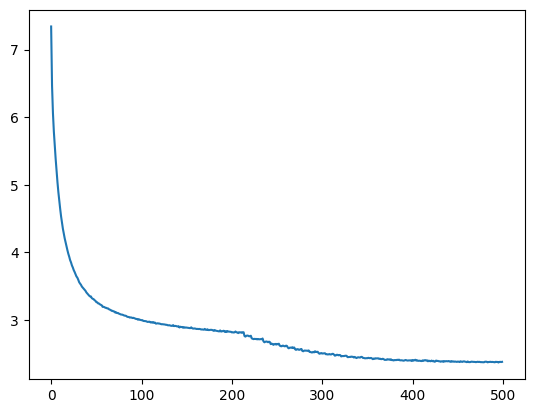

In [79]:
plt.plot(epoch_loss_avg)

In [80]:
input_data = []
for i in range(vocabulary_size):
    input_data.append(i)

In [81]:
input_data = torch.tensor(input_data)

In [82]:
import torch
import torch.nn as nn

# Assume you have a model called `my_model` with an embedding layer
embedding_layer = Transformer_Encoder.embedding  # Get the embedding layer

# Create a sample input data
#input_data = torch.tensor([1, 2, 3, 4, 5])  # example input data

# Pass the input data through the embedding layer
embeddings = embedding_layer(input_data.to(device))

# Now you have the embeddings for the input data
print(embeddings)

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.1356, -0.7048, -0.1286,  ...,  0.3614, -0.1789, -0.3168],
        [-0.6483,  0.4981,  0.4982,  ..., -1.2789, -0.1740,  1.4353],
        ...,
        [ 4.3946,  2.6016, -2.0409,  ...,  4.8027, -4.1312,  3.2823],
        [-5.8234, -2.1660, -1.9356,  ..., -2.0544, -4.9071,  1.0122],
        [ 3.3835,  0.6676, -1.2949,  ...,  0.2433, -1.2618, -2.5196]],
       device='cuda:0', grad_fn=<EmbeddingBackward0>)


In [83]:
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 60.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039294 sha256=94616f51f5bb214e9a60115d9e73106bb6c153e61e82186282eacfc269f86fa1
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.9
    Uninstalling Cython-3.0.9:
      Successfully uninstalled Cython-3.0.9


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import hdbscan


embeddings = embeddings.cpu()
# Загрузка эмбеддингов слов
#embeddings = embeddings_np
embeddings_np = embeddings.detach().numpy()

# Сокращение размерности с помощью t-SNE
tsne = TSNE(n_components=3, perplexity=3)
embeddings_tsne = tsne.fit_transform(embeddings_np)



# Кластеризация с помощью HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=6)
clusters = clusterer.fit_predict(embeddings_tsne)

# Визуализация результатов
plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], c=clusters)
plt.colorbar()
plt.show()

In [ ]:
# Получение меток классов
labels = clusterer.labels_

# Создание словаря для сопоставления слов и меток классов
word_clusters = dict(zip(vocabulary, labels))

In [ ]:
word_clusters

In [ ]:
# Создание DataFrame из словаря
df = pd.DataFrame(list(word_clusters.items()), columns=['Слово', 'Метка'])

# Запись DataFrame в Excel
df.to_excel('/content/word_clusters.xlsx', index=False)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import hdbscan

embeddings = embeddings.cpu()
# Преобразование тензора embeddings в массив numpy
embeddings_np = embeddings.detach().numpy()

# Сокращение размерности с помощью t-SNE
tsne = TSNE(n_components=2, perplexity=50, learning_rate=200)
embeddings_tsne = tsne.fit_transform(embeddings_np)

# Кластеризация с помощью HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=7)
clusters = clusterer.fit_predict(embeddings_tsne)

# Поиск индексов элементов, относящихся к кластеру -1
indices_to_keep = np.where(clusters != -1)[0]

# Фильтрация embeddings_tsne, оставляем только элементы, не относящиеся к кластеру -1
filtered_embeddings_tsne = embeddings_tsne[indices_to_keep]

# Визуализация результатов
plt.figure(figsize=(10, 10))
plt.scatter(filtered_embeddings_tsne[:, 0], filtered_embeddings_tsne[:, 1], c=clusters[indices_to_keep], cmap='rainbow', s=10, alpha=0.8)
plt.colorbar()
plt.show()